In [31]:
from sklearn import datasets
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.impute import KNNImputer

In [3]:
from sklearn.datasets import fetch_california_housing

df=fetch_california_housing(as_frame=True).frame

In [4]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.0

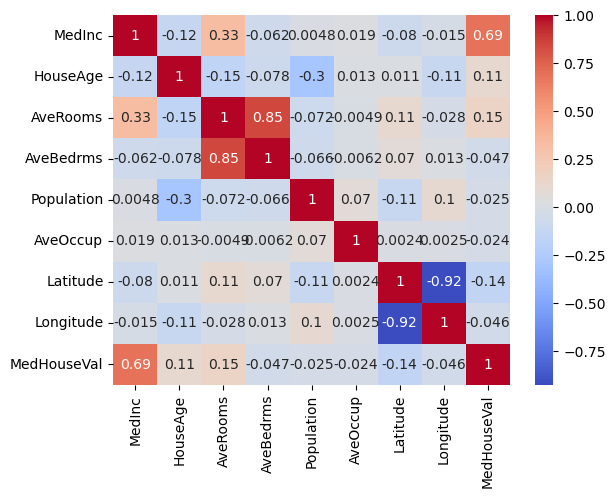

In [5]:
#Compute the correlation metrix
corr_matrix=df.corr()
print(corr_matrix)
#Visualize the correlation matrix
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

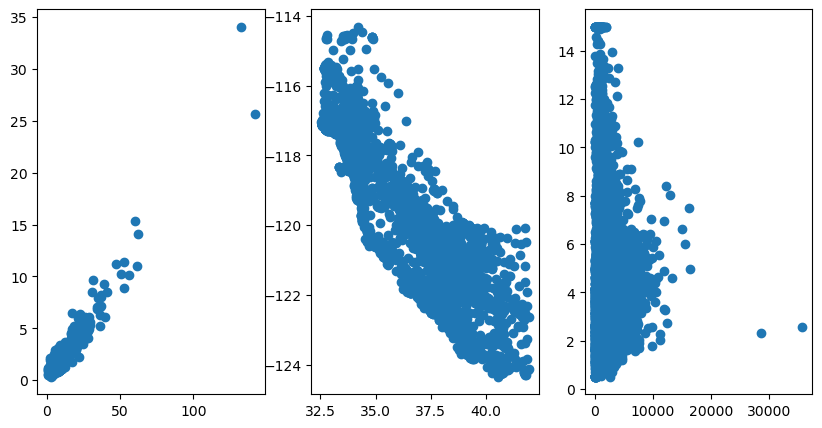

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1).scatter(df['AveRooms'],df['AveBedrms'])
plt.subplot(1,3,2).scatter(df['Latitude'],df['Longitude'])
plt.subplot(1,3,3).scatter(df['Population'],df['MedInc'])

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.drop('MedHouseVal',axis=1)# Drop the output column
#col1=lr(cols)
#col2=lr(cols)
vif_list=[]
for i in range(len(x.columns)):
    vif_list.append(variance_inflation_factor(x.values,i))
vif_data=pd.DataFrame(vif_list,index=x.columns,columns=['VIF'])
vif_data


,VIF
MedInc,11.511140
HouseAge,7.195917
AveRooms,45.993601
AveBedrms,43.590314
Population,2.935745
AveOccup,1.095243
Latitude,559.874071
Longitude,633.711654


In [10]:
corr_matrix['MedHouseVal']
idx=corr_matrix['MedHouseVal'].keys()[::-1]

In [11]:
d1=vif_data['VIF'].values
d2=corr_matrix['MedHouseVal'].values
cols=['VIF','MedHouseVal_corr']
idx=corr_matrix['MedHouseVal'].keys()[:-1]
analysis=pd.DataFrame(zip(d1,d2),columns=cols,index=idx)
analysis.sort_values(by="VIF",ascending=False)

,VIF,MedHouseVal_corr
Longitude,633.711654,-0.045967
Latitude,559.874071,-0.144160
AveRooms,45.993601,0.151948
AveBedrms,43.590314,-0.046701
MedInc,11.511140,0.688075
HouseAge,7.195917,0.105623
Population,2.935745,-0.024650
AveOccup,1.095243,-0.023737


In [12]:
analysis[analysis['VIF']>15]#selecting the those feature whos VIF value is greater thean 15
#from following d=four we need to consider only tow beacouse they are highy corellited to eachother

,VIF,MedHouseVal_corr
AveRooms,45.993601,0.151948
AveBedrms,43.590314,-0.046701
Latitude,559.874071,-0.144160
Longitude,633.711654,-0.045967


In [13]:
final_cols=['MedInc','HouseAge','Population','AveOccup','AveRooms','Longitude','MedHouseVal']
final_df=df[final_cols]
final_df

,MedInc,HouseAge,Population,AveOccup,AveRooms,Longitude,MedHouseVal
0,8.3252,41.0,322.0,2.555556,6.984127,-122.23,4.526
1,8.3014,21.0,2401.0,2.109842,6.238137,-122.22,3.585
2,7.2574,52.0,496.0,2.802260,8.288136,-122.24,3.521
3,5.6431,52.0,558.0,2.547945,5.817352,-122.25,3.413
4,3.8462,52.0,565.0,2.181467,6.281853,-122.25,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,845.0,2.560606,5.045455,-121.09,0.781
20636,2.5568,18.0,356.0,3.122807,6.114035,-121.21,0.771
20637,1.7000,17.0,1007.0,2.325635,5.205543,-121.22,0.923
20638,1.8672,18.0,741.0,2.123209,5.329513,-121.32,0.847


In [14]:
x=final_df.drop('MedHouseVal',axis=1) # it will be dataframe
y=final_df['MedHouseVal'] # it will be series
#here we are seprating a input and output columns

In [15]:
from sklearn.model_selection import train_test_split
train_test_split(x,y,test_size=0.2,random_state=1234)

[        MedInc  HouseAge  Population  AveOccup  AveRooms  Longitude
 17595   3.3682      40.0       719.0  2.357377  6.045902    -121.89
 6073   11.1077      32.0       295.0  3.105263  8.010526    -117.85
 6251    4.1190      32.0      1326.0  4.092593  4.651235    -117.97
 3161    1.7656      26.0      1222.0  3.093671  4.149367    -118.85
 1887    3.1500      27.0      1010.0  2.531328  6.721805    -119.98
 ...        ...       ...         ...       ...       ...        ...
 8222    5.0000      21.0        29.0  1.812500  3.062500    -118.23
 9449    2.7530      14.0      1153.0  2.432489  5.789030    -119.85
 8471    4.2083      33.0      1073.0  3.119186  5.026163    -118.32
 17048   6.7058      44.0      1235.0  2.589099  6.335430    -122.27
 1318    5.4409       4.0      2429.0  3.392458  7.853352    -121.77
 
 [16512 rows x 6 columns],
         MedInc  HouseAge  Population  AveOccup  AveRooms  Longitude
 15712   3.6812      52.0       614.0  1.724719  4.848315    -122.44
 4119

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)

In [17]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
dir(lr)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_metadat

In [18]:
lr.fit(x_train,y_train) # from here check the lenier regression theroy from nootbook if any dout


LinearRegression()

In [19]:
lr.coef_ # here we are getting the values of b1 ,b2 ,etc 

array([ 4.44659371e-01,  1.74116304e-02,  2.80645893e-05, -4.41839947e-03,
       -3.32436940e-02, -1.11630924e-02])

In [20]:
lr.intercept_ # here we are getting the values of b0

-1.3357725586321236

In [21]:
y_pred_user=[]
for i in x_test.values:
    out=lr.intercept_+np.sum(lr.coef_*i)
    y_pred_user.append(out)
print(y_pred_user[:5])
print(len(y_pred_user))
print(len(x_test))

[2.4217566125505536, 3.192852821512631, 2.3707934395019477, 1.7244531492472759, 3.3387456624412155]
4128
4128


In [22]:
y_predection=lr.predict(x_test)

In [24]:
data=x_test.copy()

In [25]:
data['y_actual']=y_test #actual output
data['model_predections']=y_predection # we did from scrach
data['manul_predection']=y_pred_user # model is giving


In [26]:
data

,MedInc,HouseAge,Population,AveOccup,AveRooms,Longitude,y_actual,model_predections,manul_predection
15712,3.6812,52.0,614.0,1.724719,4.848315,-122.44,5.00000,2.421757,2.421757
4119,5.5524,52.0,1842.0,2.970968,6.129032,-118.20,2.93900,3.192853,3.192853
15725,3.8750,44.0,561.0,1.720859,4.739264,-122.44,4.12500,2.370793,2.370793
14616,3.4706,20.0,1822.0,3.399254,5.274254,-117.17,1.57600,1.724453,1.724453
13238,7.7234,10.0,1221.0,3.439437,8.016901,-117.67,3.04100,3.338746,3.338746
...,...,...,...,...,...,...,...,...,...
13521,5.2072,20.0,543.0,2.888298,6.170213,-117.41,1.64300,2.435906,2.435906
16913,13.3913,25.0,1507.0,2.990079,8.869048,-122.34,5.00001,6.154020,6.154020
20069,2.5417,30.0,242.0,2.602151,5.086022,-120.37,1.23200,1.486685,1.486685
446,3.8750,52.0,386.0,1.892157,4.387255,-122.29,1.82600,2.514446,2.514446


In [27]:
sum(np.square(y_predection-y_test))/len(y_test) # r_square value

0.679054710210811

In [28]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(y_test,y_predection)

0.679054710210811

In [29]:
r2_score(y_test,y_predection)

0.49804237019099795

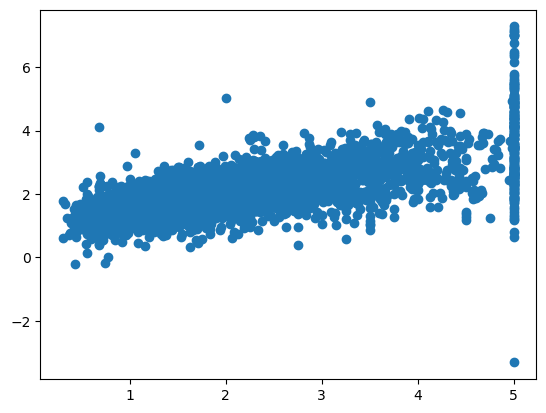

In [30]:
plt.scatter(y_test,y_predection)

In [32]:
x=final_df.drop('MedHouseVal',axis=1)
y=final_df['MedHouseVal']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1234)

In [33]:
lr=LinearRegression()

In [34]:
lr

LinearRegression()

In [35]:
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
pre=lr.predict(x_test)

In [39]:
data

,MedInc,HouseAge,Population,AveOccup,AveRooms,Longitude,y_actual,model_predections,manul_predection
15712,3.6812,52.0,614.0,1.724719,4.848315,-122.44,5.00000,2.421757,2.421757
4119,5.5524,52.0,1842.0,2.970968,6.129032,-118.20,2.93900,3.192853,3.192853
15725,3.8750,44.0,561.0,1.720859,4.739264,-122.44,4.12500,2.370793,2.370793
14616,3.4706,20.0,1822.0,3.399254,5.274254,-117.17,1.57600,1.724453,1.724453
13238,7.7234,10.0,1221.0,3.439437,8.016901,-117.67,3.04100,3.338746,3.338746
...,...,...,...,...,...,...,...,...,...
13521,5.2072,20.0,543.0,2.888298,6.170213,-117.41,1.64300,2.435906,2.435906
16913,13.3913,25.0,1507.0,2.990079,8.869048,-122.34,5.00001,6.154020,6.154020
20069,2.5417,30.0,242.0,2.602151,5.086022,-120.37,1.23200,1.486685,1.486685
446,3.8750,52.0,386.0,1.892157,4.387255,-122.29,1.82600,2.514446,2.514446


In [40]:
pd.DataFrame(pre)

,0
0,2.421757
1,3.192853
2,2.370793
3,1.724453
4,3.338746
...,...
4123,2.435906
4124,6.154020
4125,1.486685
4126,2.514446


**Model is ready**

- Model name: Linear regression

- Model name variable:lr



## Load the model

- In order to load the model we have two ways

- 1.Pickle

- 2.joblib

In [42]:
import pickle
file=open('linear_regression.pkl','wb')
pickle.dump(lr,file)

In [43]:
with open('linear_regression1.pkl','wb') as file:
    pickle.dump(lr,file)

**load**

In [48]:
file=open('linear_regression1.pkl','rb')
lr_loaded=pickle.load(file)

- This loaded model trained by how many features

     - That many values only we need to pass

- Are we passing Multiple data samples: Batch Predection

- Or aSingle data smaple :Real time predection or End point predection

In [49]:
lr_loaded.feature_names_in_

array(['MedInc', 'HouseAge', 'Population', 'AveOccup', 'AveRooms',
       'Longitude'], dtype=object)

## Real time predection

In [53]:
lr_loaded.predict([[10,20,30,40,50,60]])

C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.95118947])

## Why 2D required

In [57]:
two_samples=[[10,20,30,40,50,60],
            [100,200,300,400,500,600]]
lr_loaded.predict(two_samples)

array([ 0.95118947, 21.53384776])

In [56]:
import warnings
warnings.filterwarnings('ignore')

## By using joblib

In [61]:
import joblib
file_name='lr.joblib'
model_name=lr
joblib.dump(model_name,file_name)


['lr.joblib']

In [63]:
joblib.load('lr.joblib')

LinearRegression()

In [64]:
loaded_lr_joblib=joblib.load(file_name)
loaded_lr_joblib

LinearRegression()

In [66]:
loaded_lr_joblib.predict([[10,20,30,40,50,60]])

array([0.95118947])